# Info

https://medium.com/farmart-blog/connecting-dots-exploring-the-hough-transform-for-image-analysis-585942a7f56a


In [25]:
import matplotlib.pyplot as plt
import numpy as np


from skimage.transform import hough_line, hough_line_peaks

def hough_line_custom(image):
    # Define the Hough space parameters
    theta_res = 1  # resolution of the accumulator in degrees
    rho_res = 1  # resolution of the accumulator in pixels

    # Compute the Hough space
    accumulator, thetas, rhos = hough_line(image, theta=np.arange(-90, 90, theta_res), rho=np.arange(-np.sqrt(2) * image.shape[0], np.sqrt(2) * image.shape[0], rho_res))

    return accumulator, thetas, rhos

(-0.5, 179.5, 426.5, -0.5)

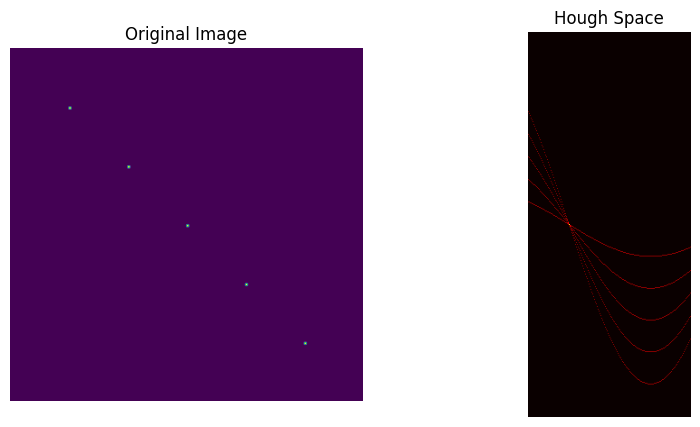

In [26]:
fig, axes = plt.subplots(1,2, figsize=(10, 5))

#create an image of size (150,150)
image = np.zeros((150,150))

#create white dots by setting the pixel values as 255
image[75, 75] = 255
image[25, 25] = 255
image[50, 50] = 255
image[100, 100] = 255
image[125, 125] = 255

#calculate the accumulator and the theta and rho values
accumulator, thetas, rhos = hough_line(image)

#plot the original image
axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')

#plot the hough space accumulator
axes[1].imshow(accumulator, cmap='hot')
axes[1].set_title('Hough Space')
axes[1].axis('off')

(91, 132)


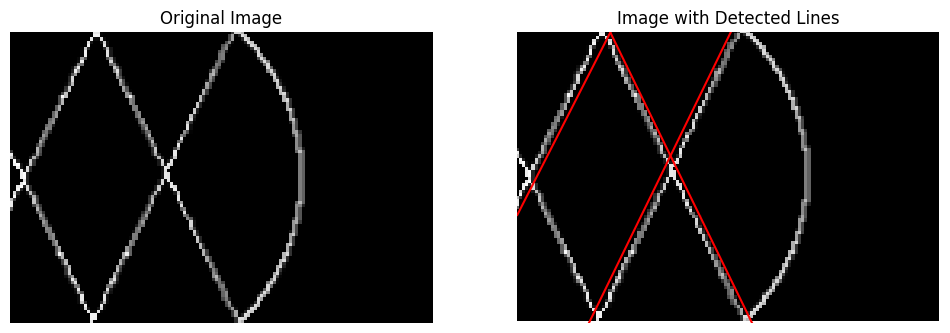

In [27]:
# Standard

import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.feature import canny
from skimage.transform import hough_line, hough_line_peaks

def plot_image_with_lines(image, lines):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot the original image
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    # Plot the image with detected lines
    axes[1].imshow(image, cmap='gray')
    for _, angle, dist in zip(*lines):
        y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
        y1 = (dist - image.shape[1] * np.cos(angle)) / np.sin(angle)
        axes[1].plot((0, image.shape[1]), (y0, y1), 'r')
    axes[1].set_xlim((0, image.shape[1]))
    axes[1].set_ylim((image.shape[0], 0))
    axes[1].set_title('Image with Detected Lines')
    axes[1].axis('off')

    plt.show()

# Load the image
image_path = r'A:\Users\Ada\GitHub\DeepClean_Repo\Parabola2 - Epoch 226.png'  # Replace with the actual path to your image
image = imread(image_path, as_gray=True)

print(image.shape)

# Apply edge detection (Canny)
edges = canny(image, sigma=2, low_threshold=0.1, high_threshold=0.3)

# Apply Standard Hough Transform
h, theta, d = hough_line(edges)

# Find the most prominent lines
lines = hough_line_peaks(h, theta, d)

# Plot the original image and the image with detected lines
plot_image_with_lines(image, lines)

(91, 132)
float64


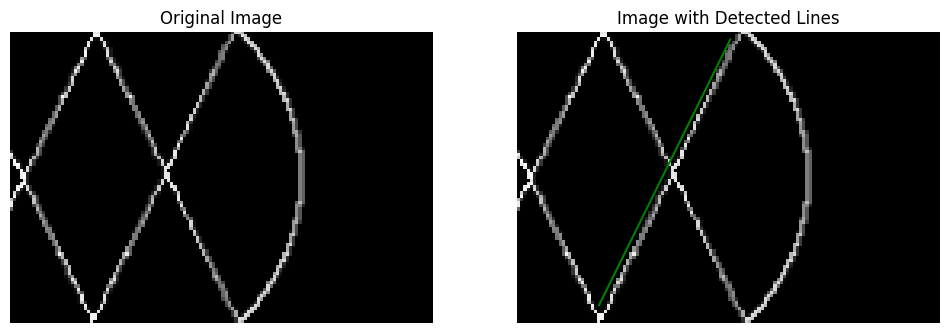

In [28]:
# Probalistic

import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.feature import canny
from skimage.transform import probabilistic_hough_line

def plot_image_with_lines(image, lines):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot the original image
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    # Plot the image with detected lines
    axes[1].imshow(image, cmap='gray')
    for line in lines:
        p0, p1 = line
        axes[1].plot((p0[0], p1[0]), (p0[1], p1[1]), 'g')
    axes[1].set_title('Image with Detected Lines')
    axes[1].axis('off')

    plt.show()

# Load the image
image_path = r'A:\Users\Ada\GitHub\DeepClean_Repo\Parabola2 - Epoch 226.png'  # Replace with the actual path to your image
image = imread(image_path, as_gray=True)

print(image.shape)
print(image.dtype)

# Apply edge detection (Canny)
edges = canny(image, sigma=2, low_threshold=0.1, high_threshold=0.3)

# Apply Probabilistic Hough Transform
min_line_length = 75
max_line_gap = 5
lines = probabilistic_hough_line(edges, threshold=10, line_length=min_line_length, line_gap=max_line_gap)

# Plot the original image and the image with detected lines
plot_image_with_lines(image, lines)

(91, 132)


ValueError: too many values to unpack (expected 2)

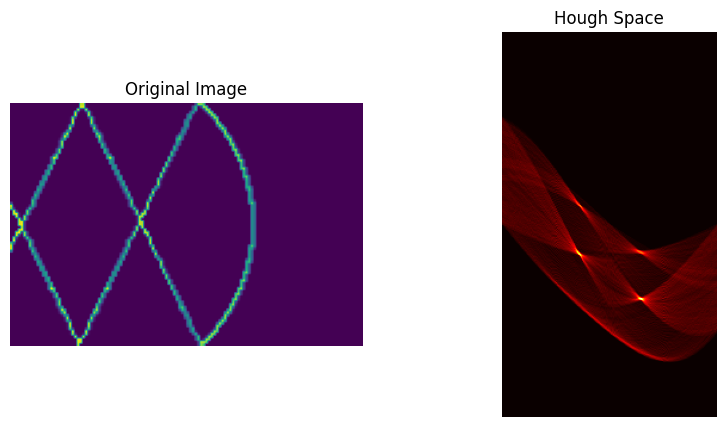

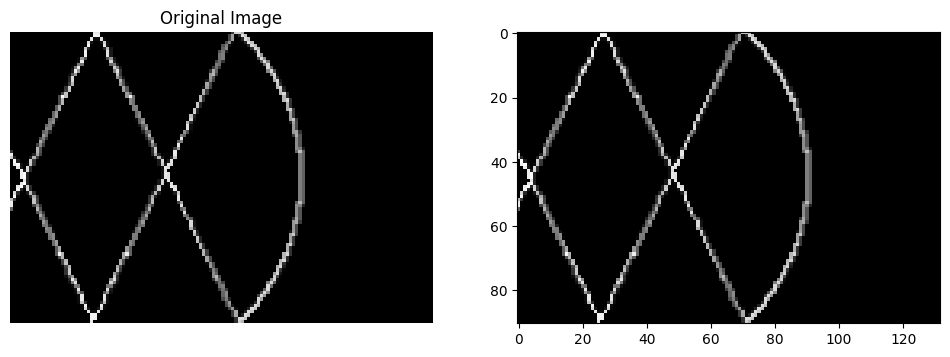

In [29]:
fig, axes = plt.subplots(1,2, figsize=(10, 5))

# Load the image
image_path = r'A:\Users\Ada\GitHub\DeepClean_Repo\Parabola2 - Epoch 226.png'  # Replace with the actual path to your image
image = imread(image_path, as_gray=True)

#calculate the accumulator and the theta and rho values
accumulator, thetas, rhos = hough_line(image)

#plot the original image
axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')

#plot the hough space accumulator
axes[1].imshow(accumulator, cmap='hot')
axes[1].set_title('Hough Space')
axes[1].axis('off')

print(image.shape   )


# Apply edge detection (Canny)
edges = canny(image, sigma=2, low_threshold=0.1, high_threshold=0.3)

# Apply Standard Hough Transform
h, theta, d = hough_line(edges)

# Find the most prominent lines
lines = hough_line_peaks(h, theta, d)

# Plot the original image and the image with detected lines
plot_image_with_lines(image, lines)




# Apply edge detection (Canny)
edges = canny(image, sigma=2, low_threshold=0.1, high_threshold=0.3)

# Apply Probabilistic Hough Transform
min_line_length = 75
max_line_gap = 5
lines = probabilistic_hough_line(edges, threshold=10, line_length=min_line_length, line_gap=max_line_gap)

# Plot the original image and the image with detected lines
plot_image_with_lines(image, lines)


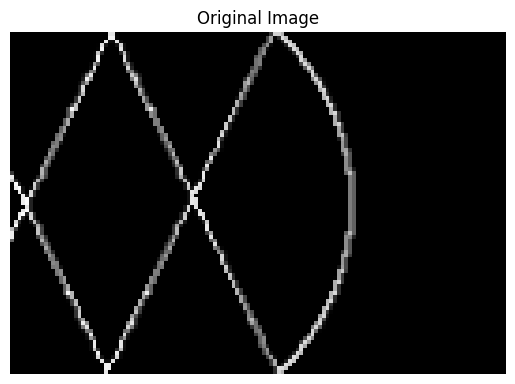

In [30]:
image_path = r'A:\Users\Ada\GitHub\DeepClean_Repo\Parabola2 - Epoch 226.png'  # Replace with the actual path to your image
image = imread(image_path, as_gray=True)


# plot image
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()


(91,)


Text(0.5, 0, 'Pixel')

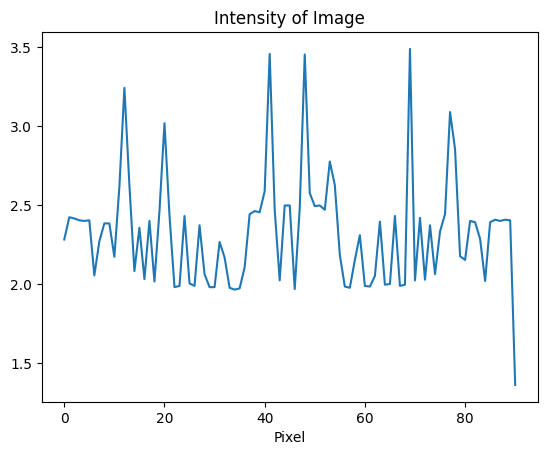

In [32]:

plt.plot(intensity)
plt.title('Intensity of Image')
plt.xlabel('Pixel')